Getting started with Python and the IPython notebook
====



The IPython notebook is an interactive, web-based environment that allows one to combine code, text and graphics into one unified document. All of the lectures in this course have been developed using this tool.  In this lecture, we will introduce the notebook interface and demonstrate some of its features.  

**New**: A new version of the IPython notebook knowan as Jupyter supports multiple kernels (differnet languages) and other enhancements. For a tour of its features, see this [notebook](http://nbviewer.ipython.org/urls/bitbucket.org/ipre/calico/raw/master/notebooks/Documentation/Reference%20Guide/Reference%20Guide.ipynb).

## Cells

The IPython notebook has two types of cells: 
    
    * Markdown
    * Code
    
Markdown is for text, and even allows some typesetting of mathematics, while the code cells allow for coding in Python and access to many other packages, compilers, etc.

### Markdown

To enter a markdown cell, just choose the cell tab and set the type to 'Markdown'. 

In [1]:
from IPython.display import Image

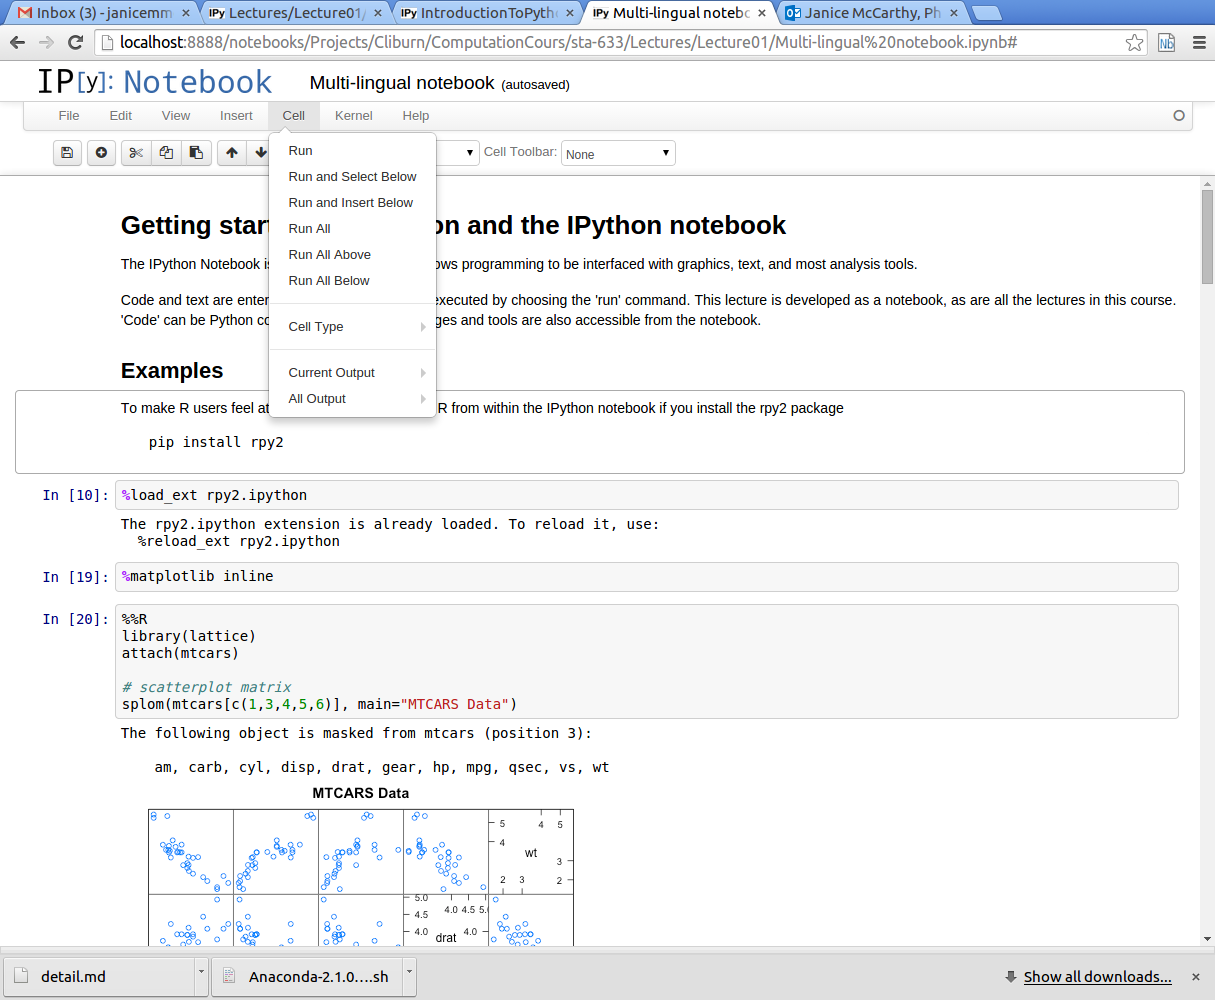

In [2]:
Image(filename='screenshot.png')

The current cell is now in Markdown mode, and whatever is entered is assumed to be markdown code. For example, text can be put into *italics* or **bold**.  A bulleted list can be entered as follows:

Bulleted List
* Item 1
* Item 2

Markdown has many features, and a good reference is located at:

http://daringfireball.net/projects/markdown/syntax

## Code Cells

Code cells take Python syntax as input. We will see a lot of those shortly, when we begin our introduction to Python.  For the moment, we will highlight additional uses for code cells. 

## Magic Commands

Magic commands work a lot like OS command line calls - and in fact, some are just that. To get a list of available magics:

In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

Notice there are line and cell magics.  Line magics take the entire line as argument, while cell magics take the cell. As 'automagic' is on, we can omit the % when making calls to line magics. 

## Python as Glue

In [10]:
%load_ext rpy2.ipython 

In [11]:
%matplotlib inline

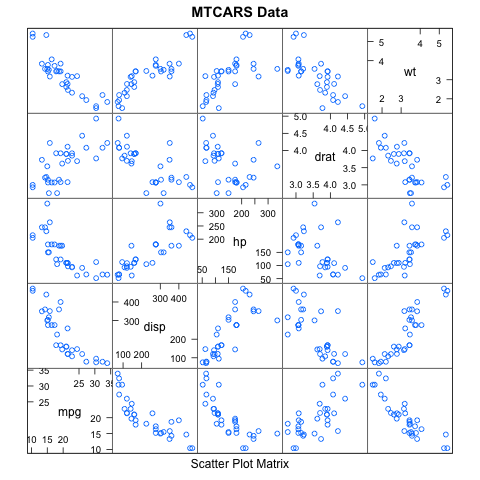

In [12]:
%%R
library(lattice) 
attach(mtcars)

# scatterplot matrix 
splom(mtcars[c(1,3,4,5,6)], main="MTCARS Data")

Matlab works too:
```bash
pip install pymatbridge
```

In [13]:
!pip install --upgrade pymatbridge

Requirement already up-to-date: pymatbridge in /Users/cliburn/anaconda/lib/python2.7/site-packages
Cleaning up...


In [14]:
import pymatbridge as pymat
ip = get_ipython()
pymat.load_ipython_extension(ip)

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
.MATLAB started and connected!


/Users/cliburn/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


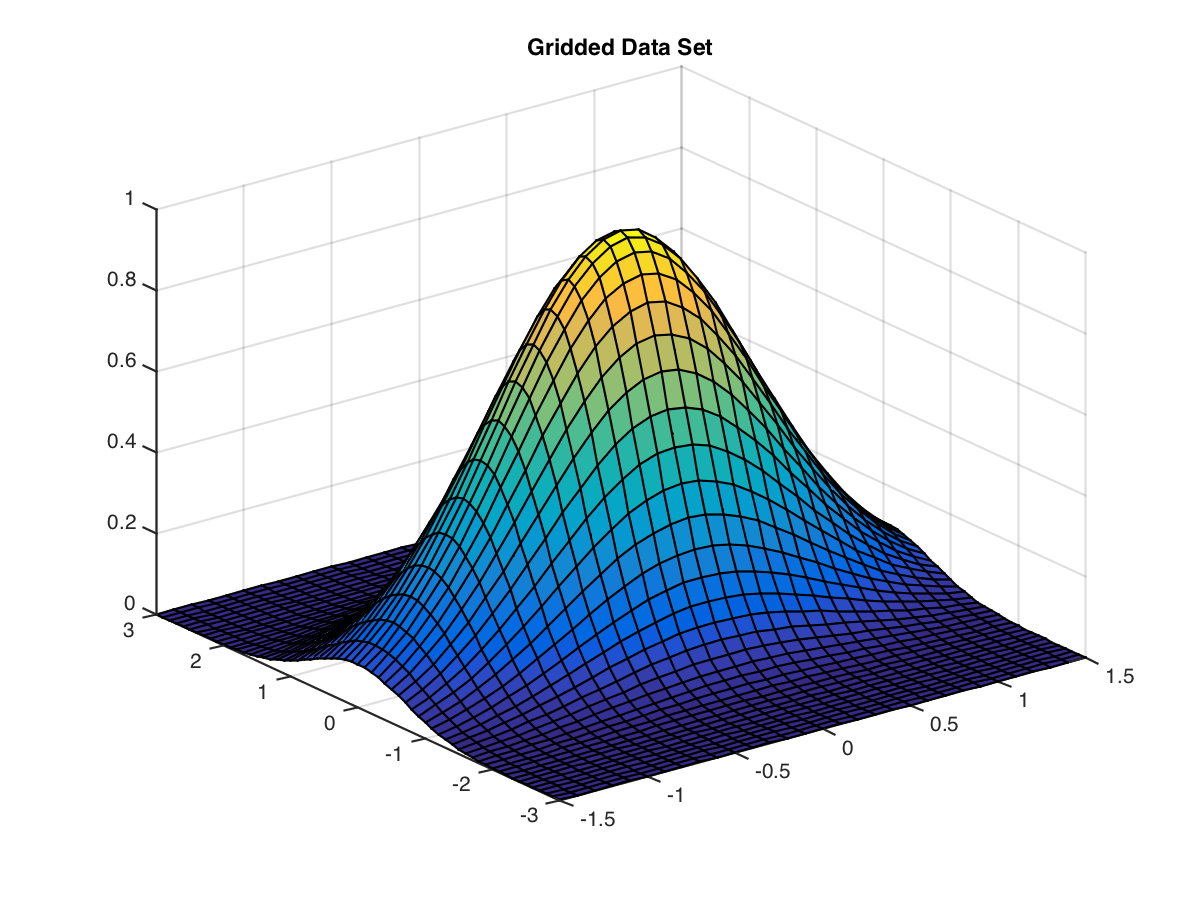

In [15]:
%%matlab

xgv = -1.5:0.1:1.5;
ygv = -3:0.1:3;
[X,Y] = ndgrid(xgv,ygv);
V = exp(-(X.^2 + Y.^2));
surf(X,Y,V)
title('Gridded Data Set', 'fontweight','b');

In [16]:
! pip install oct2py

Cleaning up...


In [18]:
%load_ext oct2py.ipython

In [19]:
%%octave

A = reshape(1:4,2,2); 
b = [36; 88];
A\b
[L,U,P] = lu(A)
[Q,R] = qr(A)
[V,D] = eig(A)

ans =

       60
       -8

L =

  1.00000  0.00000
  0.50000  1.00000

U =

        2        4
        0        1

P =

Permutation Matrix

   0   1
   1   0

Q =

  -0.44721  -0.89443
  -0.89443  0.44721

R =

  -2.23607  -4.91935
  0.00000  -0.89443

V =

  -0.90938  -0.56577
  0.41597  -0.82456

D =

Diagonal Matrix

  -0.37228        0
        0  5.37228

## Python <-> R <-> Matlab <-> Octave

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from pandas.tools.plotting import scatter_matrix

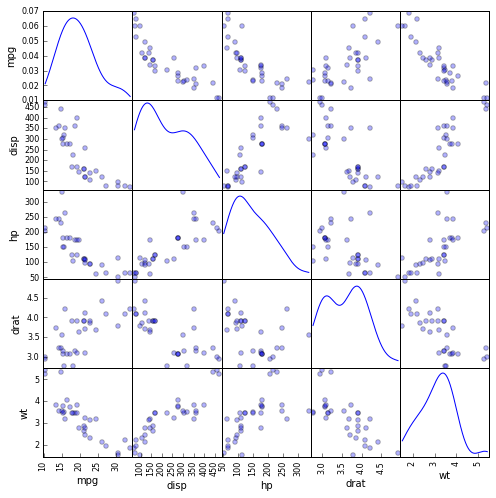

In [21]:
# First we will load the mtcars dataset and do a scatterplot matrix

mtcars = sm.datasets.get_rdataset('mtcars')
df = pd.DataFrame(mtcars.data)
scatter_matrix(df[[0,2,3,4,5]], alpha=0.3, figsize=(8, 8), diagonal='kde', marker='o');

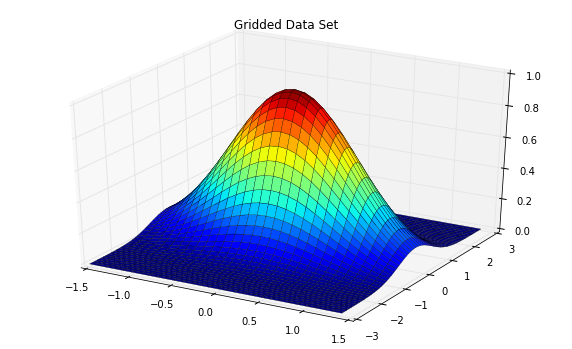

In [22]:
# Next we will do the 3D mesh

xgv = np.arange(-1.5, 1.5, 0.1)
ygv = np.arange(-3, 3, 0.1)
[X,Y] = np.meshgrid(xgv, ygv)
V = np.exp(-(X**2 + Y**2))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V, rstride=1, cstride=1, cmap=plt.cm.jet, linewidth=0.25)
plt.title('Gridded Data Set');

In [23]:
# And finally, the matrix manipulations

import scipy

A = np.reshape(np.arange(1, 5), (2,2))
b = np.array([36, 88])
ans = scipy.linalg.solve(A, b)
P, L, U = scipy.linalg.lu(A)
Q, R = scipy.linalg.qr(A)
D, V = scipy.linalg.eig(A)
print 'ans =\n', ans, '\n'
print 'L =\n', L, '\n'
print "U =\n", U, '\n'
print "P = \nPermutation Matrix\n", P, '\n'
print 'Q =\n', Q, '\n'
print "R =\n", R, '\n'
print 'V =\n', V, '\n'
print "D =\nDiagonal matrix\n", np.diag(abs(D)), '\n'

ans =
[ 16.  10.] 

L =
[[ 1.          0.        ]
 [ 0.33333333  1.        ]] 

U =
[[ 3.          4.        ]
 [ 0.          0.66666667]] 

P = 
Permutation Matrix
[[ 0.  1.]
 [ 1.  0.]] 

Q =
[[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]] 

R =
[[-3.16227766 -4.42718872]
 [ 0.         -0.63245553]] 

V =
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]] 

D =
Diagonal matrix
[[ 0.37228132  0.        ]
 [ 0.          5.37228132]] 



## More Glue: Julia and Perl

### Using Julia

In [24]:
%load_ext julia.magic

Initializing Julia interpreter. This may take some time...


In [25]:
%%julia
1 + sin(3)

1.1411200080598671

In [26]:
%%julia
s = 0.0
for n = 1:2:10000
    s += 1/n - 1/(n+1)
end
s # an expression on the last line (if it doesn't end with ";") is printed as "Out"

0.6930971830599458

In [27]:
%%julia
f(x) = x + 1
f([1,1,2,3,5,8])

[2, 2, 3, 4, 6, 9]

### Using Perl

In [28]:
%%perl

use strict;
use warnings;
 
print "Hello World!\n";

Hello World!


We hope these give you an idea of the power and flexibility this notebook environment provides!